In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('/Palindrome/pone.0212445.s004.xlsx',skiprows=[0])
print(len(data))

104


In [3]:
data.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


#### 2 (a) What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [4]:
# According to the survey estimate,there are 6 409 903 people living with HIV in the listed districts
# A district break-down is as displayed below

survey_df = data.query("Estimate == 'Survey'")
print(sum(survey_df.NoPLHIV))
df = survey_df[['District','NoPLHIV']]
display(df)

6409903


,District,NoPLHIV
0,Buffalo City,102437
2,City of Cape Town,200751
4,West Coast,11302
6,Cacadu,34732
8,Amatole,98884
10,Chris Hani,114849
12,Joe Gqabi,37766
14,O.R. Tambo,160352
16,Xhariep,11777
18,Lejweleputswa,123868


Text(0.5, 1.0, 'Number of People Living with HIV by District')

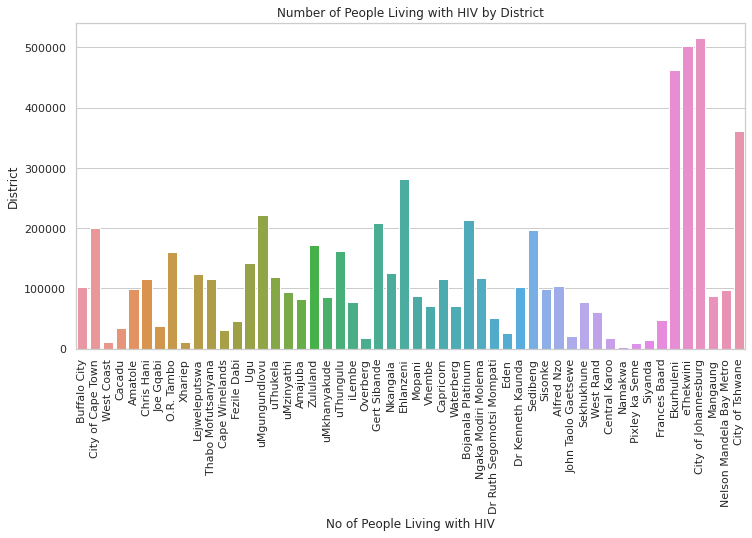

In [5]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.barplot(x="District", y="NoPLHIV", data=survey_df)
ax.set_xlabel("No of People Living with HIV", fontsize=12)
ax.set_ylabel("District", fontsize=12)
ax.set_title('Number of People Living with HIV by District')

#### 2 (b) What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [6]:
# The average NoPLHIV of the two estimates used for Xhariep is 12247.5

xhariep_df = data.query("District == 'Xhariep'")
print(xhariep_df.NoPLHIV.mean())

12247.5


#### 2 (c) Add a column and populate it with the number of people not living with HIV for each row.

In [12]:
# NB: NoPNLHIV is number of people not living with HIV
data['NoPNLHIV'] = ((data['NoPLHIV']/(data['Prevalence_%']))*100).astype(int)
data.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,753213
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,753209
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3860596
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3860587
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,418592


#### 2 (d) What is the total NoPLHIV in all the cities (districts with the word “city” or “metro” in the name)? 

In [13]:
# There are 2,572,733 NoPLHIV im all the cities with city or metro in their name

metros = data[(data['District'].str.contains('City')) | (data['District'].str.contains('Metro'))]
print(sum(metros.NoPLHIV))

2572733


#### 3) Write the original data (without the caption - originally row 1) with the extra columns as comma-separated values (CSV) to a new .csv file.

In [14]:
data.to_csv('/Palindrome/pone.0212445.s004.csv')

The test took 1.5 hours